**Packages**

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import numpy as np
import pyswarm
import joblib
import imblearn
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from pyswarm import pso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc

print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("numpy version:", np.__version__)
print("scipy version:", scipy.__version__)
print("imblearn version:", imblearn.__version__)
print("joblib version:", joblib.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Pyswarm version:", pyswarm.__version__)

pandas version: 2.0.0
matplotlib version: 3.5.1
seaborn version: 0.11.2
numpy version: 1.24.3
scipy version: 1.7.3
imblearn version: 0.10.1
joblib version: 1.2.0
scikit-learn version: 1.0.2
Pyswarm version: 0.6


**Loading data**

In [192]:
df = pd.read_csv('data.csv')

In [193]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**EDA**

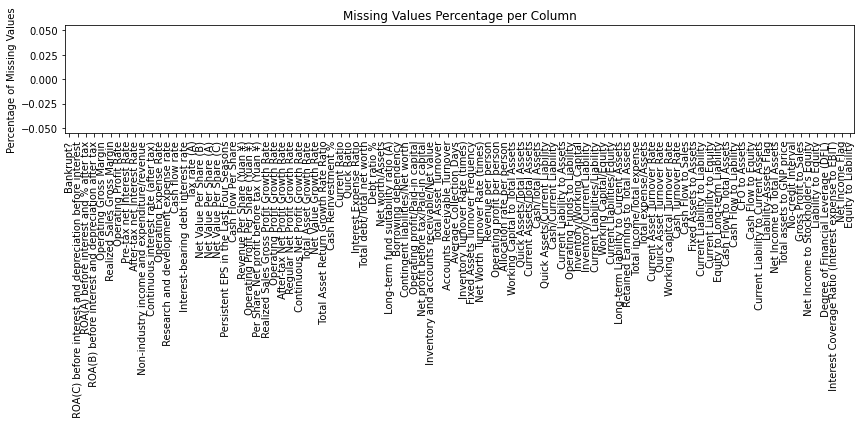

In [195]:
pds = (df[df.columns].isna().sum() / len(df.index)) * 100

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
pds.plot.bar(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Percentage per Column')
plt.tight_layout()
plt.savefig('missing_values_plot.png', dpi=300)

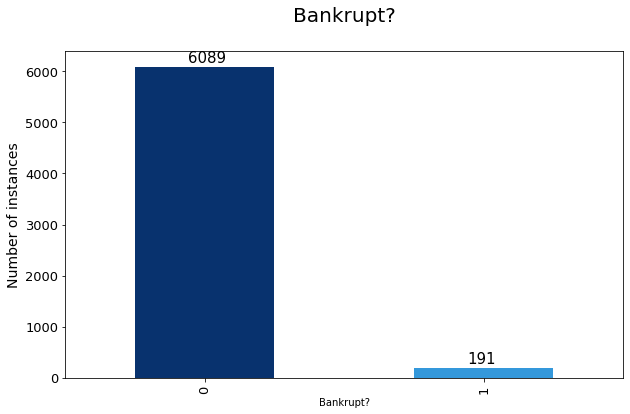

In [224]:
colors = ['#08326E', '#3498db'] 
ax = df['Bankrupt?'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=colors)
ax.set_title('Bankrupt?', size=20, pad=30)
ax.set_ylabel('Number of instances', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height()+100, str(round(i.get_height(), 2)), fontsize=15)
plt.savefig('class_imbalance.png')

In [198]:
abs(df.corr()["Bankrupt?"].sort_values(ascending=False))

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest    0.260807
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(A) before interest and % after tax                     0.282941
 Net Income to Total Assets                                 0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

**Cleaning data**

In [200]:
scaler = MinMaxScaler()

df[' Operating Expense Rate'] = scaler.fit_transform(df[[' Operating Expense Rate']])
df[' Research and development expense rate'] = scaler.fit_transform(df[[' Research and development expense rate']])
df[' Total Asset Growth Rate'] = scaler.fit_transform(df[[' Total Asset Growth Rate']])

In [201]:
threshold = 1

# Drop rows where 'Value' is greater than the threshold
df = df[df[' Revenue Per Share (Yuan ¥)'] <= threshold]
df = df[df[' Interest-bearing debt interest rate'] <= threshold]
df = df[df[' Current Ratio'] <= threshold]
df = df[df[' Quick Ratio'] <= threshold]
df = df[df[' Total debt/Total net worth'] <= threshold]
df = df[df[' Accounts Receivable Turnover'] <= threshold]
df = df[df[' Average Collection Days'] <= threshold]
df = df[df[' Revenue per person'] <= threshold]
df = df[df[' Cash/Current Liability'] <= threshold]
df = df[df[' Long-term Liability to Current Assets'] <= threshold]
df = df[df[' Net Value Growth Rate'] <= threshold]
df = df[df[' Total assets to GNP price'] <= threshold]
df = df[df[' Allocation rate per person'] <= threshold]
df = df[df[' Quick Assets/Current Liability'] <= threshold]
df = df[df[' Inventory/Current Liability'] <= threshold]

In [202]:
df= df.drop(' Current Asset Turnover Rate', axis =1)
df = df.drop(' Quick Asset Turnover Rate', axis =1)
df = df.drop(' Cash Turnover Rate', axis=1)
df = df.drop(' Inventory Turnover Rate (times)', axis = 1)
df = df.drop(' Fixed Assets Turnover Frequency', axis = 1)

In [203]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["Z-Score"], how="all", inplace=True)

In [204]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Z-Score
count,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,...,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.0,6280.000000,6280.000000
mean,0.030414,0.505390,0.558812,0.553903,0.607804,0.607787,0.998768,0.797181,0.809077,0.303582,...,0.008599,0.623868,0.607803,0.840416,0.280312,0.027589,0.565338,1.0,0.046059,5.020444
std,0.171737,0.058752,0.063285,0.059519,0.014262,0.014240,0.013531,0.012915,0.013741,0.009618,...,0.033738,0.012533,0.014262,0.014889,0.013923,0.016313,0.013705,0.0,0.040922,0.254366
min,0.000000,0.000000,0.006923,0.000000,0.156308,0.156308,0.000000,0.000000,0.000000,0.000000,...,0.000102,0.000000,0.156309,0.000000,0.000000,0.000000,0.000000,1.0,0.003946,2.682464
25%,0.000000,0.476868,0.535652,0.527692,0.600416,0.600410,0.998971,0.797386,0.809312,0.303466,...,0.000904,0.623630,0.600416,0.840115,0.277016,0.026791,0.565158,1.0,0.024389,4.893205
50%,0.000000,0.502657,0.559638,0.552278,0.605886,0.605846,0.999022,0.797462,0.809374,0.303524,...,0.002068,0.623871,0.605884,0.841160,0.278852,0.026813,0.565274,1.0,0.033429,5.011363
75%,0.000000,0.535270,0.588435,0.583717,0.613602,0.613593,0.999093,0.797574,0.809465,0.303582,...,0.005196,0.624149,0.613601,0.842329,0.281495,0.026924,0.565763,1.0,0.051621,5.147700
max,1.000000,0.971530,1.000000,1.000000,0.665151,0.666023,0.999778,0.804849,0.816045,1.000000,...,1.000000,1.000000,0.665149,1.000000,1.000000,1.000000,1.000000,1.0,0.551868,10.980524


**Adding Z-score**

In [199]:
df["Z-Score"] = (1.2*df[' Working Capital to Total Assets']) +(1.4* df[" Retained Earnings to Total Assets"]) +(3.3* df[" ROA(C) before interest and depreciation before interest"]) +(0.6* df[" Equity to Liability"]) +(df[" Cash Flow to Sales"]/df[" Cash Flow to Total Assets"])
print(df["Z-Score"])

0       5.141074
1       5.009168
2       5.363821
3       5.240076
4       5.197101
          ...   
6814    5.270386
6815    4.816855
6816    4.936334
6817    5.952991
6818    5.079258
Name: Z-Score, Length: 6819, dtype: float64


**Creating subsets for distinguishment**

In [205]:
bankrupt = df[df["Bankrupt?"]==1]

In [206]:
notbankrupt = df[df['Bankrupt?']==0]

In [302]:
mean_z_score_notbankrupt =(np.mean(notbankrupt["Z-Score"]))
std_z_score_notbankrupt =(np.std(notbankrupt["Z-Score"]))
min_z_score_notbankrupt =(np.min(notbankrupt["Z-Score"]))
max_z_score_notbankrupt =(np.max(notbankrupt["Z-Score"]))

print("the mean z score of companies that did not gone bankrupt =", mean_z_score_notbankrupt)
print("the standard deviation z score of companies that did not gone bankrupt =", std_z_score_notbankrupt)
print("the min z score of companies that did not gone bankrupt =", min_z_score_notbankrupt)
print("the max z score of companies that did not gone bankrupt =", max_z_score_notbankrupt)

the mean z score of companies that did not gone bankrupt = 5.032527198671609
the standard deviation z score of companies that did not gone bankrupt = 0.24268539439783804
the min z score of companies that did not gone bankrupt = 2.6824643512300708
the max z score of companies that did not gone bankrupt = 10.980523684559346


In [303]:
mean_z_score_bankrupt = (np.mean(bankrupt["Z-Score"]))
std_z_score_bankrupt = (stats.sem(bankrupt["Z-Score"]))
min_z_score_bankrupt = (np.min(bankrupt["Z-Score"]))
max_z_score_bankrupt = (np.max(bankrupt["Z-Score"]))

print("the mean z score of companies that gone bankrupt =", mean_z_score_bankrupt)
print("the standard deviation z score of companies that gone bankrupt =", std_z_score_bankrupt)
print("the min z score of companies that gone bankrupt =", min_z_score_bankrupt)
print("the max z score of companies that gone bankrupt =", max_z_score_bankrupt)

the mean z score of companies that gone bankrupt = 4.6352497563666395
the standard deviation z score of companies that gone bankrupt = 0.022528092422786358
the min z score of companies that gone bankrupt = 3.1883938799755205
the max z score of companies that gone bankrupt = 5.6265961749552655


**create new classes based on threshold**

In [211]:
threshold = np.percentile(bankrupt["Z-Score"], 95)
print(threshold)
notbankrupt.loc[notbankrupt['Z-Score'] <= threshold, 'Bankrupt?'] = 1
notbankrupt.loc[notbankrupt['Z-Score'] > threshold, 'Bankrupt?'] = 0
bankrupt.loc[bankrupt['Z-Score'] <= threshold, 'Bankrupt?'] = 1
bankrupt.loc[bankrupt['Z-Score'] > threshold, 'Bankrupt?'] = 0

notbankrupt_stable = notbankrupt.loc[notbankrupt['Bankrupt?'] == 0]
notbankrupt_unstable = notbankrupt.loc[notbankrupt['Bankrupt?'] == 1]
bankrupt_unstable = bankrupt.loc[bankrupt['Bankrupt?'] == 1]
bankrupt_stable = bankrupt.loc[bankrupt['Bankrupt?'] == 0]

4.955159970010038


In [212]:
notbankrupt_stable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 6817
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 3931 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  3931 non-null   float64
 2    ROA(A) before interest and % after tax                   3931 non-null   float64
 3    ROA(B) before interest and depreciation after tax        3931 non-null   float64
 4    Operating Gross Margin                                   3931 non-null   float64
 5    Realized Sales Gross Margin                              3931 non-null   float64
 6    Operating Profit Rate                                    3931 non-null   float64
 7    Pre-tax net Interest Rate                                3931 non-null   float64
 8    After-tax net Interest

In [213]:
notbankrupt_unstable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2158 entries, 5 to 6816
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 2158 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  2158 non-null   float64
 2    ROA(A) before interest and % after tax                   2158 non-null   float64
 3    ROA(B) before interest and depreciation after tax        2158 non-null   float64
 4    Operating Gross Margin                                   2158 non-null   float64
 5    Realized Sales Gross Margin                              2158 non-null   float64
 6    Operating Profit Rate                                    2158 non-null   float64
 7    Pre-tax net Interest Rate                                2158 non-null   float64
 8    After-tax net Interest

In [214]:
bankrupt_stable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 533 to 6166
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 10 non-null     int64  
 1    ROA(C) before interest and depreciation before interest  10 non-null     float64
 2    ROA(A) before interest and % after tax                   10 non-null     float64
 3    ROA(B) before interest and depreciation after tax        10 non-null     float64
 4    Operating Gross Margin                                   10 non-null     float64
 5    Realized Sales Gross Margin                              10 non-null     float64
 6    Operating Profit Rate                                    10 non-null     float64
 7    Pre-tax net Interest Rate                                10 non-null     float64
 8    After-tax net Interest

In [215]:
bankrupt_unstable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 30 to 6761
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 181 non-null    int64  
 1    ROA(C) before interest and depreciation before interest  181 non-null    float64
 2    ROA(A) before interest and % after tax                   181 non-null    float64
 3    ROA(B) before interest and depreciation after tax        181 non-null    float64
 4    Operating Gross Margin                                   181 non-null    float64
 5    Realized Sales Gross Margin                              181 non-null    float64
 6    Operating Profit Rate                                    181 non-null    float64
 7    Pre-tax net Interest Rate                                181 non-null    float64
 8    After-tax net Interest

**Merging the subsets into one dataset**

In [216]:
financially_stable = pd.concat([bankrupt_stable, notbankrupt_stable], ignore_index=True)
financially_unstable = pd.concat([bankrupt_unstable, notbankrupt_unstable], ignore_index=True)
df_stability = pd.concat([financially_stable, financially_unstable], ignore_index=True)

In [217]:
financially_stable.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Z-Score
count,3941.0,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,...,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.0,3941.000000,3941.000000
mean,0.0,0.533259,0.587118,0.581563,0.611427,0.611384,0.998820,0.797364,0.809276,0.303790,...,0.008698,0.624139,0.611425,0.842096,0.278840,0.027017,0.565592,1.0,0.052980,5.152418
std,0.0,0.046010,0.046728,0.044950,0.013572,0.013551,0.015917,0.012712,0.011558,0.011106,...,0.039227,0.010293,0.013572,0.001572,0.003207,0.007017,0.004357,0.0,0.045729,0.193678
min,0.0,0.324965,0.272405,0.356497,0.156308,0.156308,0.000000,0.000000,0.084286,0.300733,...,0.000107,0.408682,0.156309,0.830389,0.274860,0.002439,0.522389,1.0,0.013137,4.955329
25%,0.0,0.503242,0.559584,0.552439,0.603526,0.603475,0.999013,0.797456,0.809368,0.303502,...,0.000843,0.623742,0.603527,0.841115,0.276587,0.026794,0.565173,1.0,0.028115,5.024014
50%,0.0,0.524399,0.578500,0.572996,0.609248,0.609219,0.999061,0.797525,0.809426,0.303538,...,0.001867,0.623947,0.609247,0.841921,0.278109,0.026819,0.565289,1.0,0.038475,5.106155
75%,0.0,0.554526,0.607229,0.602548,0.616700,0.616620,0.999141,0.797637,0.809518,0.303605,...,0.004611,0.624216,0.616697,0.842888,0.280094,0.026891,0.565597,1.0,0.061017,5.236247
max,0.0,0.971530,1.000000,1.000000,0.665151,0.666023,0.999778,0.804849,0.816045,1.000000,...,1.000000,1.000000,0.665149,0.852146,0.307998,0.464388,0.736985,1.0,0.551868,10.980524


In [218]:
financially_unstable.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Z-Score
count,2339.0,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,...,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.0,2339.000000,2339.000000
mean,1.0,0.458432,0.511119,0.507299,0.601700,0.601725,0.998679,0.796874,0.808743,0.303231,...,0.008431,0.623411,0.601698,0.837586,0.282793,0.028554,0.564911,1.0,0.034398,4.798081
std,0.0,0.046773,0.058736,0.051445,0.013283,0.013286,0.008044,0.013247,0.016787,0.006353,...,0.021536,0.015589,0.013283,0.024050,0.022214,0.025104,0.021729,0.0,0.027507,0.178119
min,1.0,0.000000,0.006923,0.000000,0.445646,0.445646,0.612132,0.160516,0.000000,0.000000,...,0.000102,0.000000,0.445645,0.000000,0.000000,0.000000,0.000000,1.0,0.003946,2.682464
25%,1.0,0.443158,0.492559,0.492746,0.596791,0.596812,0.998879,0.797195,0.809133,0.303350,...,0.001002,0.623407,0.596789,0.837830,0.278315,0.026649,0.564549,1.0,0.020673,4.753787
50%,1.0,0.470677,0.529274,0.521923,0.600873,0.600881,0.998961,0.797356,0.809286,0.303482,...,0.002446,0.623732,0.600868,0.839755,0.280660,0.026786,0.565158,1.0,0.026395,4.850986
75%,1.0,0.486521,0.545601,0.537127,0.606192,0.606214,0.999001,0.797418,0.809339,0.303540,...,0.006242,0.623986,0.606188,0.840550,0.283910,0.027116,0.566654,1.0,0.036702,4.909222
max,1.0,0.558963,0.619549,0.605011,0.665151,0.665151,0.999457,0.798896,0.810734,0.307373,...,0.484613,0.956387,0.665149,1.000000,1.000000,1.000000,1.000000,1.0,0.355524,4.955156


In [220]:
df_stability.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Z-Score
count,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,...,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.0,6280.000000,6280.000000
mean,0.372452,0.505390,0.558812,0.553903,0.607804,0.607787,0.998768,0.797181,0.809077,0.303582,...,0.008599,0.623868,0.607803,0.840416,0.280312,0.027589,0.565338,1.0,0.046059,5.020444
std,0.483496,0.058752,0.063285,0.059519,0.014262,0.014240,0.013531,0.012915,0.013741,0.009618,...,0.033738,0.012533,0.014262,0.014889,0.013923,0.016313,0.013705,0.0,0.040922,0.254366
min,0.000000,0.000000,0.006923,0.000000,0.156308,0.156308,0.000000,0.000000,0.000000,0.000000,...,0.000102,0.000000,0.156309,0.000000,0.000000,0.000000,0.000000,1.0,0.003946,2.682464
25%,0.000000,0.476868,0.535652,0.527692,0.600416,0.600410,0.998971,0.797386,0.809312,0.303466,...,0.000904,0.623630,0.600416,0.840115,0.277016,0.026791,0.565158,1.0,0.024389,4.893205
50%,0.000000,0.502657,0.559638,0.552278,0.605886,0.605846,0.999022,0.797462,0.809374,0.303524,...,0.002068,0.623871,0.605884,0.841160,0.278852,0.026813,0.565274,1.0,0.033429,5.011363
75%,1.000000,0.535270,0.588435,0.583717,0.613602,0.613593,0.999093,0.797574,0.809465,0.303582,...,0.005196,0.624149,0.613601,0.842329,0.281495,0.026924,0.565763,1.0,0.051621,5.147700
max,1.000000,0.971530,1.000000,1.000000,0.665151,0.666023,0.999778,0.804849,0.816045,1.000000,...,1.000000,1.000000,0.665149,1.000000,1.000000,1.000000,1.000000,1.0,0.551868,10.980524


In [ ]:
df_stability.rename(columns={'Bankrupt?': 'Financially Stable?'}, inplace=True)

**New Class distribution**

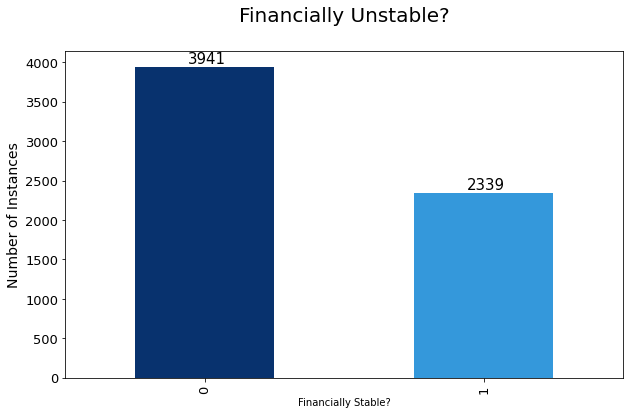

In [282]:
colors = ['#08326E', '#3498db']

ax = df_stability['Financially Stable?'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=colors)
ax.set_title('Financially Unstable?', size=20, pad=30)
ax.set_ylabel('Number of Instances', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

plt.savefig('class_imbalance_financial_stability.png')


**Drop features that are connected to the distinguishment**

In [225]:
df_stability = df_stability.drop("Z-Score", axis = 1)
df_stability = df_stability.drop(' Working Capital to Total Assets', axis = 1)
df_stability = df_stability.drop(" Retained Earnings to Total Assets", axis = 1)
df_stability = df_stability.drop(" ROA(C) before interest and depreciation before interest", axis = 1)
df_stability = df_stability.drop(" Equity to Liability", axis = 1)
df_stability = df_stability.drop(" Cash Flow to Sales", axis = 1)
df_stability = df_stability.drop(" Cash Flow to Total Assets", axis = 1)

**Splitting data**

In [227]:
X = df_stability.drop("Financially Stable?", axis = 1)
y = df_stability["Financially Stable?"]

In [228]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [155]:
print(len(X))
print(len(y))
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6280
6280
5024
5024
1256
1256


**RFE**

In [156]:

model = LogisticRegression(max_iter =1000)

num_features_to_select_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
f1_scores = {}

for num_features_to_select in num_features_to_select_values:
    rfe = RFE(model, n_features_to_select=num_features_to_select)
    
    X_train_selected = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_selected, y_train)
    
    X_test_selected = rfe.transform(X_test)
    
    
    y_pred = model.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='binary')  # 'weighted' for multiclass classification
    
    
    f1_scores[num_features_to_select] = f1


best_num_features = max(f1_scores, key=f1_scores.get)

print("Best Number of Features:", best_num_features)
print("F1 Score for the Best Number of Features:", f1_scores[best_num_features])


best_rfe = RFE(model, n_features_to_select=best_num_features)
joblib.dump(best_rfe, 'best_rfe_stability.joblib')
X_train_selected = best_rfe.fit_transform(X_train, y_train)
selected_features_indices = best_rfe.support_
selected_features_names = X.columns[selected_features_indices]

df_selected_stability = df_stability[selected_features_names]

df_selected_stability.info()

Best Number of Features: 20
F1 Score for the Best Number of Features: 0.8716814159292035
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0    ROA(A) before interest and % after tax             6280 non-null   float64
 1    ROA(B) before interest and depreciation after tax  6280 non-null   float64
 2    Net Value Per Share (B)                            6280 non-null   float64
 3    Net Value Per Share (A)                            6280 non-null   float64
 4    Net Value Per Share (C)                            6280 non-null   float64
 5    Persistent EPS in the Last Four Seasons            6280 non-null   float64
 6    Operating Profit Per Share (Yuan ¥)                6280 non-null   float64
 7    Per Share Net profit before tax (Yuan ¥)           6280 non-null   fl

In [229]:
model = LogisticRegression(max_iter = 1000)

num_features_to_select = 20
rfe = RFE(model, n_features_to_select=num_features_to_select)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print(selected_features)


Index([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Operating profit per person', ' Allocation rate per person',
       ' Current Assets/Total Assets', ' Current Liability to Assets',
       ' Cash Flow to Liability', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Net Income to Total Assets'],
      dtype='object')


In [230]:
df_selected_stability = df_stability[selected_features]

In [231]:
df_selected_stability.describe()

,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Operating profit per person,Allocation rate per person,Current Assets/Total Assets,Current Liability to Assets,Cash Flow to Liability,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets
count,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000
mean,0.558812,0.553903,0.190531,0.190509,0.190546,0.228423,0.109001,0.183891,0.113583,0.886417,0.108894,0.182405,0.400390,0.015333,0.519610,0.090253,0.461768,0.315625,0.030988,0.807962
std,0.063285,0.059519,0.031231,0.031308,0.031317,0.030779,0.025780,0.029831,0.051832,0.051832,0.025622,0.028422,0.030523,0.036508,0.217144,0.048079,0.027740,0.013087,0.023664,0.038023
min,0.006923,0.000000,0.069656,0.065063,0.065063,0.000000,0.000000,0.000000,0.003537,0.474590,0.000000,0.000000,0.000000,0.000000,0.001407,0.000784,0.000000,0.000000,0.000770,0.224792
25%,0.535652,0.527692,0.173823,0.173823,0.173823,0.214711,0.096246,0.170445,0.074576,0.850735,0.096241,0.169427,0.392503,0.004260,0.349753,0.053771,0.457161,0.313021,0.018250,0.796774
50%,0.559638,0.552278,0.184316,0.184316,0.184358,0.224449,0.104226,0.179559,0.112556,0.887444,0.104141,0.178339,0.395875,0.007949,0.510576,0.082887,0.459777,0.314970,0.027729,0.810372
75%,0.588435,0.583717,0.199359,0.199359,0.199402,0.238371,0.116033,0.193041,0.149265,0.925424,0.115852,0.191251,0.401698,0.014803,0.684451,0.119122,0.464115,0.317707,0.038302,0.825996
max,1.000000,1.000000,0.549197,0.549197,0.549197,0.779522,0.735445,0.792348,0.525410,0.996463,0.735429,0.792105,1.000000,1.000000,0.998800,0.343143,1.000000,1.000000,0.611724,1.000000


In [287]:
X = df_selected_stability
y = df_stability["Financially Stable?"]

In [288]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=1)

**Baseline**

In [148]:
svm_classifier = SVC(probability =True, kernel = "linear")
svm_classifier.fit(X_train, y_train)

y_pred_proba_baseline_financial_stability = svm_classifier.predict_proba(X_test)[:, 1]

y_pred_baseline_financial_stability = svm_classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       775
           1       0.88      0.79      0.83       481

    accuracy                           0.88      1256
   macro avg       0.88      0.86      0.87      1256
weighted avg       0.88      0.88      0.88      1256



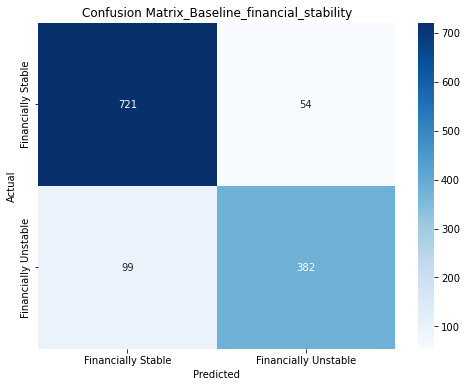

In [149]:
print(classification_report(y_test, y_pred_baseline_financial_stability))
cm = confusion_matrix(y_test, y_pred_baseline_financial_stability)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable', 'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_Baseline_financial_stability')
plt.savefig("Confusion Matrix Baseline_financial_stability_20 features.png")

**Baseline training**

In [234]:
svm_classifier = SVC(probability =True, kernel = "linear")
svm_classifier.fit(X_train, y_train)

y_pred_proba_baseline_financial_stability_train = svm_classifier.predict_proba(X_train)[:, 1]

y_pred_baseline_financial_stability_train = svm_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3166
           1       0.92      0.85      0.88      1858

    accuracy                           0.92      5024
   macro avg       0.92      0.90      0.91      5024
weighted avg       0.92      0.92      0.92      5024



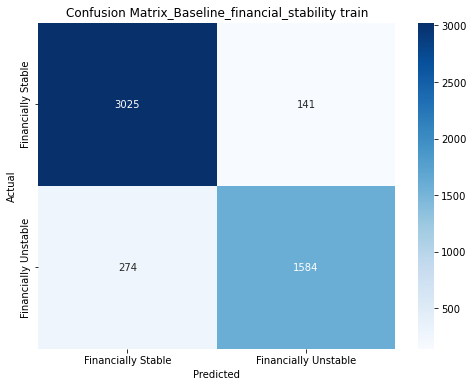

In [235]:
print(classification_report(y_train, y_pred_baseline_financial_stability_train))
cm = confusion_matrix(y_train, y_pred_baseline_financial_stability_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_Baseline_financial_stability train')
plt.savefig("Confusion Matrix Baseline_financial_stability_train.png")

**SMOTE-Tomek resampling**

Class=1, n=1858 (36.982%)
Class=0, n=3166 (63.018%)


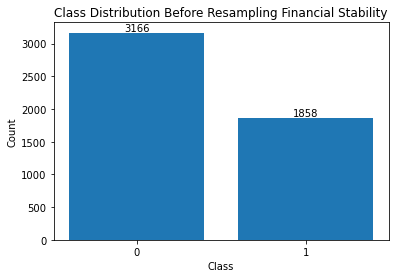

In [289]:
counter = Counter(y_train)

for k, v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution with class numbers
fig, ax = pyplot.subplots()
bars = ax.bar(counter.keys(), counter.values())

# add class numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# set labels and save the plot
pyplot.xticks([0, 1])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before Resampling Financial Stability')
pyplot.savefig("Class_imbalance_rate_before_financial_stability.png")


Class=1, n=3115 (50.000%)
Class=0, n=3115 (50.000%)


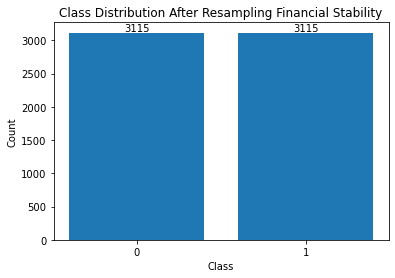

In [290]:
oversample = SMOTETomek()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k, v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

fig, ax = pyplot.subplots()
bars = ax.bar(counter.keys(), counter.values())

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

pyplot.xticks([0, 1])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution After Resampling Financial Stability')
pyplot.savefig("Class_imbalance_rate_after_financial_stability")

**SVM + SMOTE-Tomek**

In [241]:
svm_classifier = SVC(probability = True)

param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']# Kernel coefficient (only for 'rbf' kernel)
}


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, verbose = 3, scoring='f1')

grid_search.fit(X_train, y_train)

best_params_svm_financial_stability = grid_search.best_params_


joblib.dump(best_params_svm_financial_stability, 'best_params_svm_financial_stability.joblib')

best_svm_classifier = SVC(**best_params_svm_financial_stability, probability = True)
best_svm_classifier.fit(X_train, y_train)

y_pred_svm_financial_stability = best_svm_classifier.predict(X_test)
y_pred_proba_svm_financial_stability = best_svm_classifier.predict_proba(X_test)[:, 1]
print("Best Hyperparameters:", best_params_svm_financial_stability)
print("Classification Report for Testing Data:\n", classification_report(y_test, y_pred_svm_financial_stability))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.891 total time=   3.1s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.895 total time=   3.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.898 total time=   3.5s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.874 total time=   3.1s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.890 total time=   3.3s
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.903 total time=   5.7s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.900 total time=   5.4s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.903 total time=   5.7s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.884 total time=   5.9s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       775
           1       0.96      0.97      0.96       481

    accuracy                           0.97      1256
   macro avg       0.97      0.97      0.97      1256
weighted avg       0.97      0.97      0.97      1256



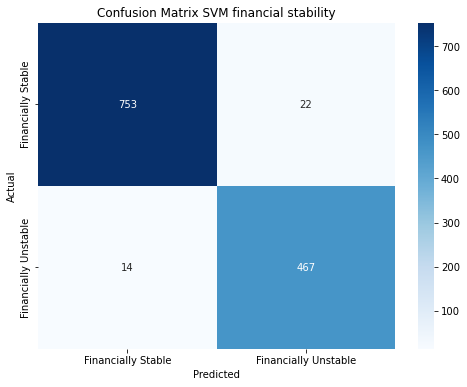

In [272]:
print(classification_report(y_test, y_pred_svm_financial_stability))
cm = confusion_matrix(y_test, y_pred_svm_financial_stability)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM financial stability')
plt.savefig("Confusion Matrix SVM financial stability.png")

**SVM +SMOTE-Tomek Training**

In [261]:
svm_classifier = SVC(probability =True, kernel = 'rbf', C = 100, gamma = 10, class_weight = None)
svm_classifier.fit(X_train, y_train)

y_pred_proba_svm_financial_stability_train = svm_classifier.predict_proba(X_train)[:, 1]

y_pred_svm_financial_stability_train = svm_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3117
           1       0.98      0.99      0.99      3117

    accuracy                           0.99      6234
   macro avg       0.99      0.99      0.99      6234
weighted avg       0.99      0.99      0.99      6234



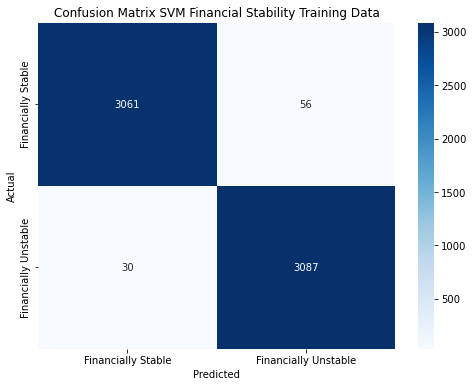

In [262]:
print(classification_report(y_train, y_pred_svm_financial_stability_train))
cm = confusion_matrix(y_train, y_pred_svm_financial_stability_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM Financial Stability Training Data')
plt.savefig("Confusion Matrix SVM financial tability training data.png")

**AdaBoost + SMOTE-Tomek resamplng**

In [274]:
X = df_selected_stability
y = df_stability["Financially Stable?"]

In [275]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Class=1, n=1858 (29.586%)
Class=0, n=3166 (50.414%)


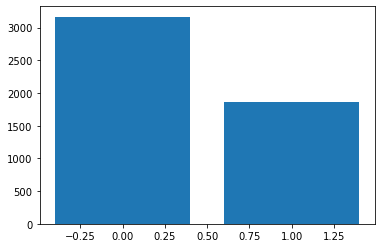

In [276]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=3125 (50.000%)
Class=0, n=3125 (50.000%)


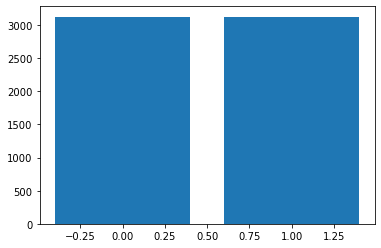

In [277]:
oversample = SMOTETomek()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**AdaBoost + SMOTE-Tomek**

In [271]:
grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.5, 0.8, 1],
    'algorithm': ['SAMME.R']
}

model = AdaBoostClassifier()


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, verbose=3, scoring= 'f1')


grid_results = grid_search.fit(X, y)


best_params_adaboost_financial_stability = grid_search.best_params_


best_adaboost_classifier = AdaBoostClassifier(**best_params_adaboost_financial_stability)
best_adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_financial_stability = best_adaboost_classifier.predict(X_test)
y_pred_adaboost_proba_financial_stability = best_adaboost_classifier.predict_proba(X_test)[:,1]

print("Best Hyperparameters:", best_params_adaboost_financial_stability)
print("Classification Report for Testing Data:\n", classification_report(y_test, y_pred_adaboost_financial_stability))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.895 total time=   0.6s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.818 total time=   0.5s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.889 total time=   0.7s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.901 total time=   0.6s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.864 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.899 total time=   1.4s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.845 total time=   1.3s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.918 total time=   1.5s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.927 total time=   1.3s
[CV 5/5] END algorithm=SAMME.R, lea

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       775
           1       0.94      0.97      0.96       481

    accuracy                           0.96      1256
   macro avg       0.96      0.97      0.96      1256
weighted avg       0.97      0.96      0.97      1256



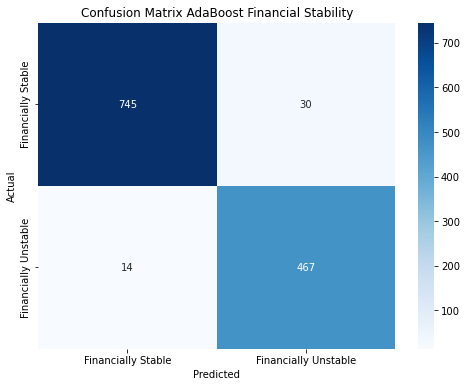

Feature Importances: {' ROA(A) before interest and % after tax': 0.04, ' ROA(B) before interest and depreciation after tax': 0.215, ' Net Value Per Share (B)': 0.005, ' Net Value Per Share (A)': 0.015, ' Net Value Per Share (C)': 0.025, ' Persistent EPS in the Last Four Seasons': 0.025, ' Operating Profit Per Share (Yuan ¥)': 0.025, ' Per Share Net profit before tax (Yuan ¥)': 0.025, ' Debt ratio %': 0.02, ' Net worth/Assets': 0.055, ' Operating profit/Paid-in capital': 0.01, ' Net profit before tax/Paid-in capital': 0.055, ' Operating profit per person': 0.01, ' Allocation rate per person': 0.04, ' Current Assets/Total Assets': 0.095, ' Current Liability to Assets': 0.035, ' Cash Flow to Liability': 0.045, ' Cash Flow to Equity': 0.135, ' Current Liability to Current Assets': 0.095, ' Net Income to Total Assets': 0.03}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, ' ROA(A) before interest and % after tax'),
  Text(1, 0, ' ROA(B) before interest and depreciation after tax'),
  Text(2, 0, ' Net Value Per Share (B)'),
  Text(3, 0, ' Net Value Per Share (A)'),
  Text(4, 0, ' Net Value Per Share (C)'),
  Text(5, 0, ' Persistent EPS in the Last Four Seasons'),
  Text(6, 0, ' Operating Profit Per Share (Yuan ¥)'),
  Text(7, 0, ' Per Share Net profit before tax (Yuan ¥)'),
  Text(8, 0, ' Debt ratio %'),
  Text(9, 0, ' Net worth/Assets'),
  Text(10, 0, ' Operating profit/Paid-in capital'),
  Text(11, 0, ' Net profit before tax/Paid-in capital'),
  Text(12, 0, ' Operating profit per person'),
  Text(13, 0, ' Allocation rate per person'),
  Text(14, 0, ' Current Assets/Total Assets'),
  Text(15, 0, ' Current Liability to Assets'),
  Text(16, 0, ' Cash Flow to Liability'),
  Text(17, 0, ' Cash Flow to Equity'),
  Text(18, 0, ' Current Liability to 

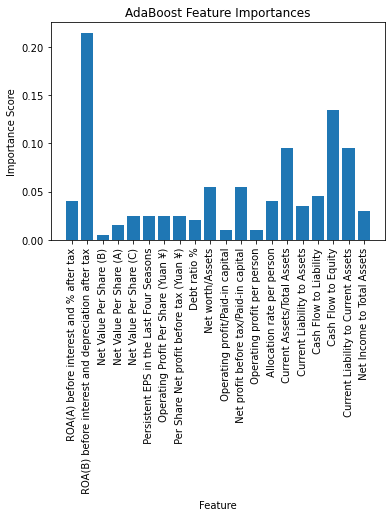

In [301]:
cm = confusion_matrix(y_test, y_pred_adaboost_financial_stability)
print(classification_report(y_test, y_pred_adaboost_financial_stability))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix AdaBoost Financial Stability')
plt.savefig("Confusion_matrix_adaboost_financial_stability.png")
plt.show()

if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
else:
    # Provide feature names explicitly if X is a NumPy array
    feature_names = [f'Feature {i}' for i in range(1, X.shape[1] + 1)]

feature_importances = best_adaboost_classifier.feature_importances_

non_zero_indices = np.where(feature_importances != 0)[0]
feature_names_filtered = [feature_names[i] for i in non_zero_indices]
feature_importances_filtered = feature_importances[non_zero_indices]

importance_dict = dict(zip(feature_names_filtered, feature_importances_filtered))
print("Feature Importances:", importance_dict)

plt.bar(range(len(feature_names_filtered)), feature_importances_filtered, tick_label=feature_names_filtered)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('AdaBoost Feature Importances')
plt.xticks(rotation=90)

**AdaBoost + SMOTE-Tomek Training**

In [278]:
adaboost_classifier = AdaBoostClassifier(
    #base_classifier,
    n_estimators=200,
    learning_rate=1,
    algorithm='SAMME.R'
)
adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_financial_stability_train = adaboost_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3125
           1       0.99      0.99      0.99      3125

    accuracy                           0.99      6250
   macro avg       0.99      0.99      0.99      6250
weighted avg       0.99      0.99      0.99      6250



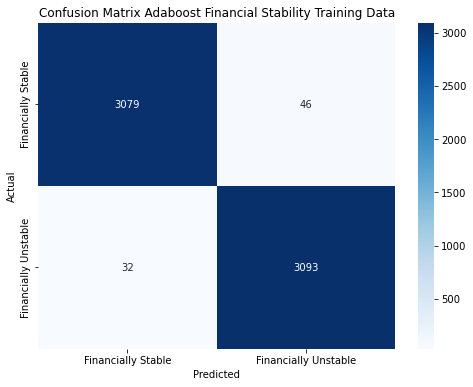

In [279]:
print(classification_report(y_train, y_pred_adaboost_financial_stability_train))
cm = confusion_matrix(y_train, y_pred_adaboost_financial_stability_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Adaboost Financial Stability Training Data')
plt.savefig("Confusion_matrix_adaboost_financial_stability_training_data.png")

**PSO-AdaBoost + SMOTE-Tomek resampling**

In [285]:
X = df_selected_stability
y = df_stability["Financially Stable?"]

In [286]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Class=1, n=1858 (29.586%)
Class=0, n=3166 (50.414%)


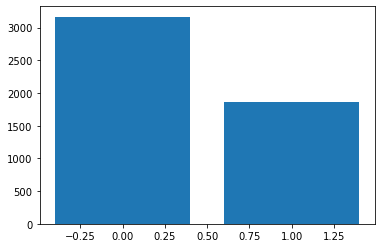

In [184]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=3109 (50.000%)
Class=0, n=3109 (50.000%)


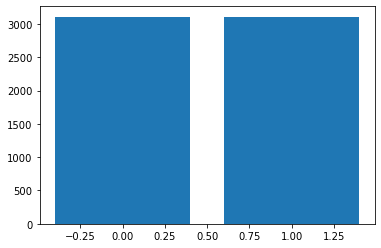

In [185]:
oversample = SMOTETomek()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**PSO-AdaBoost + SMOTE-Tomek**

In [186]:
def objective_function(params):
    n_estimators, learning_rate = params
    adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                        n_estimators=int(n_estimators),
                                        learning_rate=learning_rate,
                                        random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    return -weighted_f1

param_bounds = [(1, 200), (0.01, 1.0)]

lb, ub = zip(*param_bounds)

best_params, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=10)

best_n_estimators, best_learning_rate = best_params

final_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          n_estimators=int(best_n_estimators),
                                          learning_rate=best_learning_rate,
                                          random_state=42)
final_adaboost_model.fit(X_train, y_train)


y_pred_adaboost_pso_financial_stability = final_adaboost_model.predict(X_test)
y_pred_adaboost_pso_proba_financial_stability = final_adaboost_model.predict_proba(X_test)[:,1]

Stopping search: maximum iterations reached --> 10


NameError: name 'weighted_f1' is not defined

Best Hyperparameters: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.45003722315230343, n_estimators=137,
                   random_state=42) [137.055766     0.45003722]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       775
           1       0.95      0.98      0.96       481

    accuracy                           0.97      1256
   macro avg       0.96      0.97      0.97      1256
weighted avg       0.97      0.97      0.97      1256



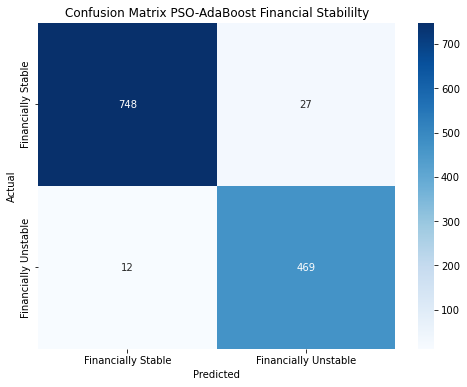

In [295]:
print("Best Hyperparameters:", final_adaboost_model, best_params)
cm = confusion_matrix(y_test, y_pred_adaboost_pso_financial_stability)
print(classification_report(y_test, y_pred_adaboost_pso_financial_stability))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-AdaBoost Financial Stabililty')
plt.savefig("Confusion_matrix_pso_adaboost_financial_stability.png")

**PSO-AdaBoost + SMOTE-Tomek Training**

In [296]:
adaboost_model_train = AdaBoostClassifier(n_estimators = 137, learning_rate = 0.45)
adaboost_model_train.fit(X_train, y_train)

y_pred_pso_adaboost_financial_stability_train = adaboost_model_train.predict(X_train)

Best Hyperparameters: [137.055766     0.45003722]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3115
           1       0.97      0.97      0.97      3115

    accuracy                           0.97      6230
   macro avg       0.97      0.97      0.97      6230
weighted avg       0.97      0.97      0.97      6230



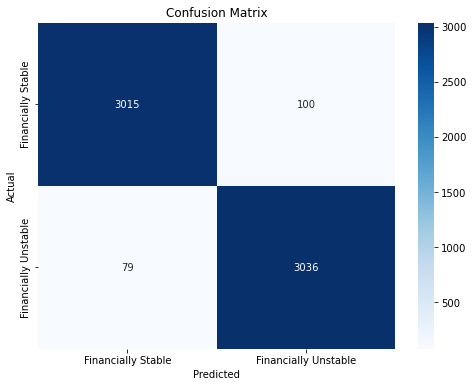

In [299]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_train, y_pred_pso_adaboost_financial_stability_train)
print(classification_report(y_train, y_pred_pso_adaboost_financial_stability_train))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Financially Stable',  'Financially Unstable'],
            yticklabels=['Financially Stable',  'Financially Unstable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Confusion_matrix_pso_adaboost_financial_stability_training_data.png")

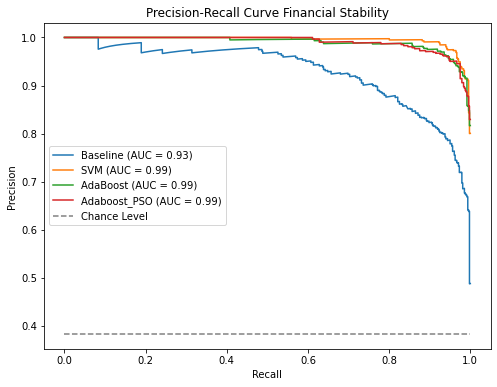

In [300]:
precision_baseline_financial_stability, recall_baseline_financial_stability, _ = precision_recall_curve(y_test, y_pred_proba_baseline_financial_stability)
precision_svm_financial_stability, recall_svm_financial_stability, _ = precision_recall_curve(y_test, y_pred_proba_svm_financial_stability)
precision_adaboost_financial_stability, recall_adaboost_financial_stability, _ = precision_recall_curve(y_test, y_pred_adaboost_proba_financial_stability)
precision_adaboost_pso_financial_stability, recall_adaboost_pso_financial_stability, _ = precision_recall_curve(y_test, y_pred_adaboost_pso_proba_financial_stability)


auc_score_baseline_financial_stability = auc(recall_baseline_financial_stability, precision_baseline_financial_stability)
auc_score_svm_financial_stability = auc(recall_svm_financial_stability, precision_svm_financial_stability)
auc_score_adaboost_financial_stability = auc(recall_adaboost_financial_stability, precision_adaboost_financial_stability)
auc_score_adaboost_pso_financial_stability = auc(recall_adaboost_pso_financial_stability, precision_adaboost_pso_financial_stability)
no_skill = len(y_test[y_test==1]) / len(y_test)


plt.figure(figsize=(8, 6))
plt.plot(recall_baseline_financial_stability, precision_baseline_financial_stability, label=f"Baseline (AUC = {auc_score_baseline_financial_stability:.2f})")
plt.plot(recall_svm_financial_stability, precision_svm_financial_stability, label=f"SVM (AUC = {auc_score_svm_financial_stability:.2f})")
plt.plot(recall_adaboost_financial_stability, precision_adaboost_financial_stability, label=f"AdaBoost (AUC = {auc_score_adaboost_financial_stability:.2f})")
plt.plot(recall_adaboost_pso_financial_stability, precision_adaboost_pso_financial_stability, label=f"Adaboost_PSO (AUC = {auc_score_adaboost_pso_financial_stability:.2f})")
plt.plot([0, 1], [no_skill, no_skill], linestyle="--", color="gray", label="Chance Level")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Financial Stability')
plt.legend()
plt.savefig('PR_curve_financial_stability.png')